# Quantum. Project 1

Author:

- ***Nikita Makarevich (Student ID: 153989)***

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import Aer
import qiskit.visualization as qvis
import numpy as np
import matplotlib.pyplot as plt


# selection of quantum simulator (or processor)
backend = Aer.get_backend("qasm_simulator")

## Helper Functions

In [ ]:
def plot_circuit_and_results(circuit: QuantumCircuit, counts: list[dict]):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    circuit.draw("mpl", ax=axs[0])
    qvis.plot_histogram(
        counts,
        ax=axs[1],
    )
    qvis.plot_distribution(
        counts,
        legend=[f"Execution {i + 1}" for i in range(3)],
        ax=axs[2],
    )
    axs[0].set_title("Circuit")
    axs[1].set_title("Distribution [counts]")
    axs[2].set_title("Probabilities")


def run_experiments(
    backend, circuit: QuantumCircuit, *, shots: int = 2048, runs: int = 3
) -> list[dict]:
    return [
        backend.run(circuit, shots=shots).result().get_counts() for _ in range(runs)
    ]

## Task 1

In [ ]:
n = 4  # determining the number of quantum and classical registers
seria = 2048  # number of trials in a series of measurements of a given type
# Example of measuring the state of qubit q[0]
nx = n  # Number of qubits and bits
qx = QuantumRegister(nx)
cx = ClassicalRegister(nx)
circuit1 = QuantumCircuit(qx, cx)  # Quantum algorithm - quantum circuit
circuit1.measure(qx[0], cx[0])  # Checking the states of qubits - quantum measurement

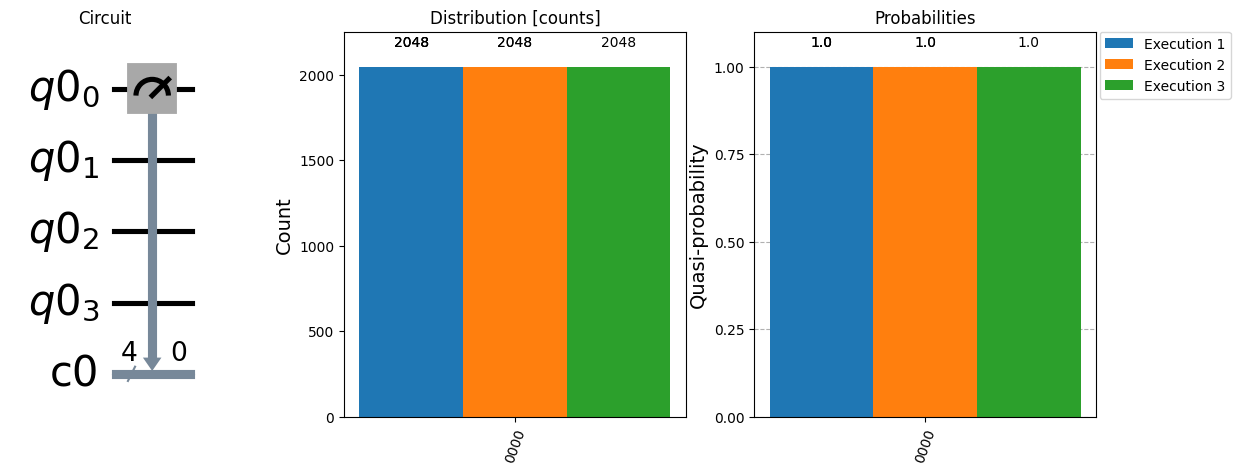

In [ ]:
count = run_experiments(backend, circuit1, shots=seria, runs=3)
plot_circuit_and_results(circuit1, count)

## Task 2

In [ ]:
qreg_q = QuantumRegister(4, "q")
creg_c = ClassicalRegister(4, "c")
circuit2 = QuantumCircuit(qreg_q, creg_c)

circuit2.x(qreg_q[0])
circuit2.measure(qreg_q[0], creg_c[0])

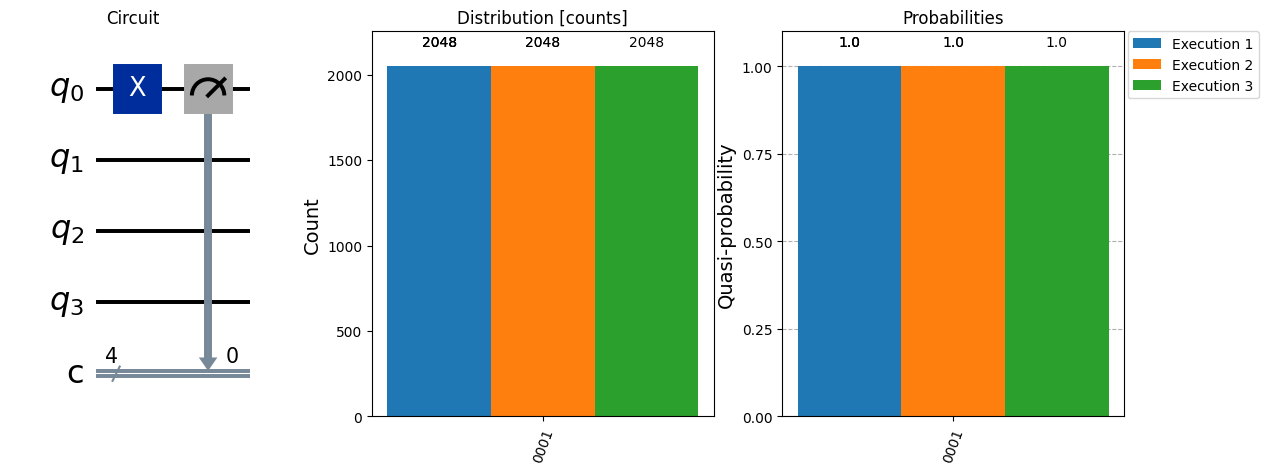

In [ ]:
counts = run_experiments(backend, circuit2, shots=2048, runs=3)
plot_circuit_and_results(circuit2, counts)

## Task 3

In [ ]:
qreg_q = QuantumRegister(4, "q")
creg_c = ClassicalRegister(4, "c")
circuit3 = QuantumCircuit(qreg_q, creg_c)

circuit3.h(qreg_q[0])
circuit3.measure(qreg_q[0], creg_c[0])

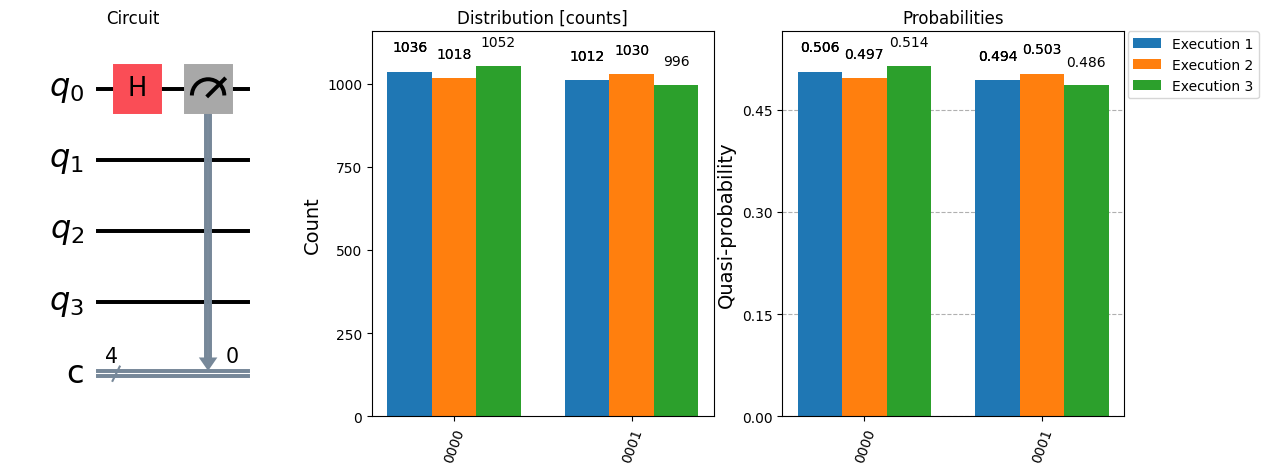

In [ ]:
counts = run_experiments(backend, circuit3, shots=2048, runs=3)
plot_circuit_and_results(circuit3, counts)

## Task 4

### Measuring in the X base

In [23]:
qreg_q = QuantumRegister(4, "q")
creg_c = ClassicalRegister(4, "c")
circuit4_x = QuantumCircuit(qreg_q, creg_c)

circuit4_x.ry(np.pi / 2, qreg_q[0])
circuit4_x.p(np.pi / 2, qreg_q[0])
circuit4_x.h(qreg_q[0])
circuit4_x.measure(qreg_q[0], creg_c[0])

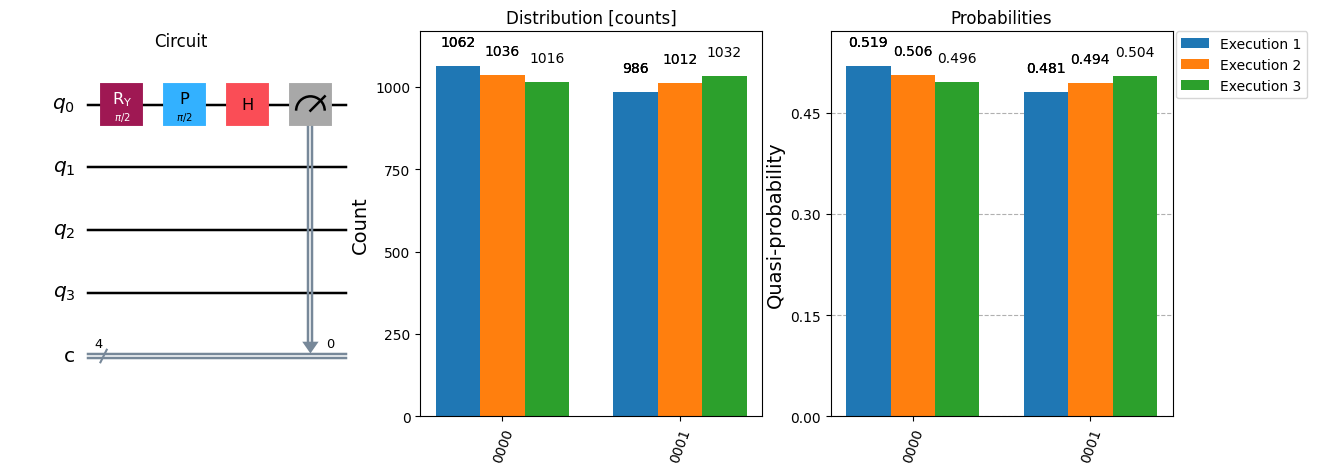

In [24]:
counts = run_experiments(backend, circuit4_x, shots=2048, runs=3)
plot_circuit_and_results(circuit4_x, counts)

### Measuring in the Y base

In [25]:
qreg_q = QuantumRegister(4, "q")
creg_c = ClassicalRegister(4, "c")
circuit4_y = QuantumCircuit(qreg_q, creg_c)

circuit4_y.ry(np.pi / 2, qreg_q[0])
circuit4_y.p(np.pi / 2, qreg_q[0])
circuit4_y.sdg(qreg_q[0])
circuit4_y.h(qreg_q[0])
circuit4_y.measure(qreg_q[0], creg_c[0])

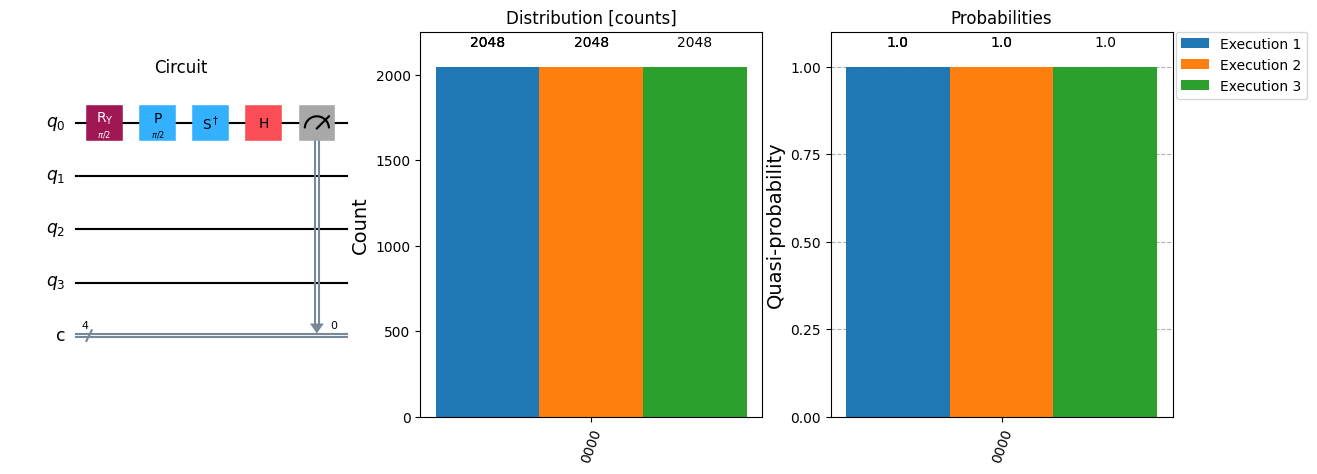

In [26]:
counts = run_experiments(backend, circuit4_y, shots=2048, runs=3)
plot_circuit_and_results(circuit4_y, counts)

### Measuring in the Z base

In [27]:
qreg_q = QuantumRegister(4, "q")
creg_c = ClassicalRegister(4, "c")
circuit4_z = QuantumCircuit(qreg_q, creg_c)

circuit4_z.ry(np.pi / 2, qreg_q[0])
circuit4_z.p(np.pi / 2, qreg_q[0])
circuit4_z.measure(qreg_q[0], creg_c[0])

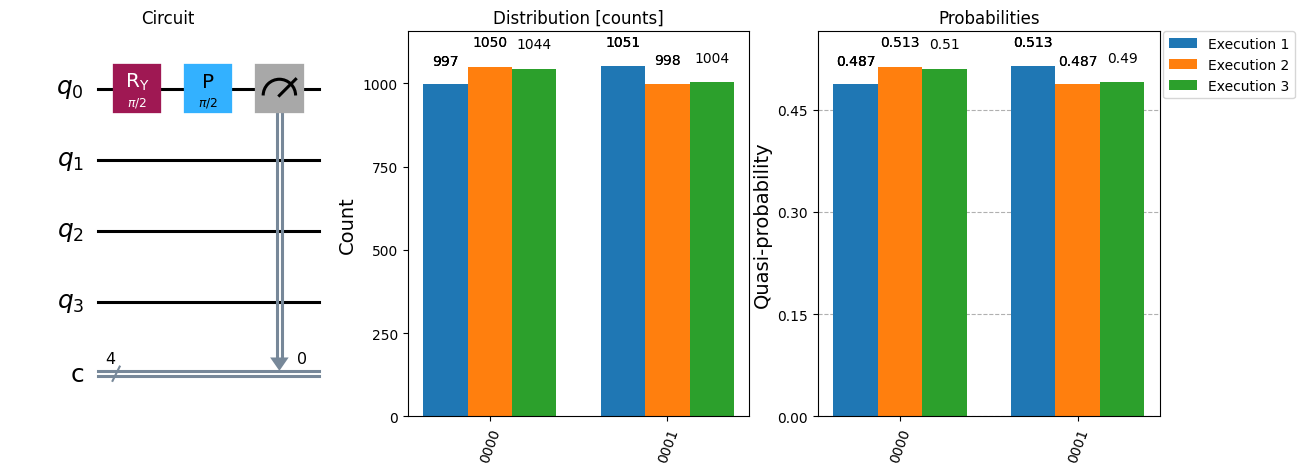

In [28]:
counts = run_experiments(backend, circuit4_z, shots=2048, runs=3)
plot_circuit_and_results(circuit4_z, counts)